In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
## import packages 
import numpy as np 
import pandas as pd 

## Load the data

We will also select the column, on which we want to pre-process to train our model. 
Each molecule has an ID, molecule name, and conformation name along with features and labeled class.

In [4]:
## Read all the data
data = pd.read_csv("musk.csv")
print(data.shape)
data.head()

(6598, 170)


,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [5]:
## data selection and preprocess 
X_data = data.iloc[:, 3:169]
print(X_data.shape)
X_data

(6598, 166)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-238,-134,-154,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,137,168,-60,-135,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,51,-123,-23,-108,-117,134,-160,82,-230,-28,...,62,-66,164,-14,-29,107,171,-44,-115,118
6594,44,-104,-19,-105,-117,142,-165,68,-225,-32,...,60,-51,166,-9,150,129,158,-66,-144,-5
6595,44,-102,-19,-104,-117,72,-165,65,-219,-12,...,-226,90,117,-8,150,130,159,-66,-144,-6
6596,51,-121,-23,-106,-117,63,-161,79,-224,-30,...,-238,86,99,-14,-31,106,171,-44,-116,117


### Describe the data
Here we looking at the statistic of the pre-processed data 

In [6]:
X_data.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,...,-210.975447,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233
std,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,...,83.710890,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085
min,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,...,-257.000000,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000
25%,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,-96.750000,...,-240.000000,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000
50%,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,-29.000000,...,-236.000000,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000
75%,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,4.000000,...,-231.000000,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000
max,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,231.000000,...,145.000000,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000


### Scale the data 
In the above-processed data, we see that range and values vary a lot. We would like to normalize our data since Neural Network works best (in general) on normalized data. 

In [7]:
## scale the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X_data) 
df_temp = pd.DataFrame(x_scaled, columns = X_data.columns, index = X_data.index)
X_data[X_data.columns] = df_temp
X_data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,0.238390,0.309524,0.431452,0.163636,0.002257,0.605744,0.534527,0.117431,0.604592,0.562863,...,0.032338,0.047393,0.680905,0.393293,0.299435,0.459906,0.150362,0.409247,0.530201,0.676611
1,0.222910,0.037415,0.088710,0.494545,0.002257,0.462141,0.583120,0.099083,0.525510,0.359768,...,0.054726,0.637441,0.545226,0.573171,0.419962,0.483491,0.173913,0.390411,0.489933,0.656325
2,0.238390,0.017007,0.088710,0.516364,0.002257,0.668407,0.583120,0.104587,0.525510,0.510638,...,0.047264,0.459716,0.163317,0.588415,0.495292,0.497642,0.166667,0.380137,0.474832,0.608592
3,0.222910,0.037415,0.088710,0.494545,0.002257,0.459530,0.583120,0.100917,0.525510,0.361702,...,0.052239,0.635071,0.540201,0.573171,0.421846,0.483491,0.172101,0.392123,0.491611,0.657518
4,0.222910,0.037415,0.088710,0.494545,0.002257,0.459530,0.583120,0.100917,0.525510,0.361702,...,0.052239,0.635071,0.540201,0.573171,0.421846,0.485849,0.172101,0.392123,0.491611,0.657518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,0.253870,0.258503,0.580645,0.021818,0.002257,0.827676,0.028133,0.563303,0.038265,0.499033,...,0.793532,0.620853,0.962312,0.371951,0.171375,0.415094,0.177536,0.419521,0.525168,0.702864
6594,0.232198,0.323129,0.596774,0.032727,0.002257,0.848564,0.015345,0.537615,0.051020,0.491296,...,0.788557,0.656398,0.967337,0.387195,0.508475,0.466981,0.153986,0.381849,0.476510,0.556086
6595,0.232198,0.329932,0.596774,0.036364,0.002257,0.665796,0.015345,0.532110,0.066327,0.529981,...,0.077114,0.990521,0.844221,0.390244,0.508475,0.469340,0.155797,0.381849,0.476510,0.554893
6596,0.253870,0.265306,0.580645,0.029091,0.002257,0.642298,0.025575,0.557798,0.053571,0.495164,...,0.047264,0.981043,0.798995,0.371951,0.167608,0.412736,0.177536,0.419521,0.523490,0.701671


In [8]:
## labels for each sample
y_data = data['class']
y_data

0       1
1       1
2       1
3       1
4       1
       ..
6593    0
6594    0
6595    0
6596    0
6597    0
Name: class, Length: 6598, dtype: int64

### Split the data 

The following function will split the data into a training set and validation set in 80:20 ratio (since we have less data).
We see that data has two types of molecule, first starting row belonging to class one and rest to class zero. We want to select training and test data from both the classes, so we have set the shuffle to True, it will select data randomly for training and test set in the proportion we want.

In [9]:
## split the data into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, shuffle=True)


In [10]:
## check training data
X_train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
257,0.241486,0.323129,0.427419,0.149091,0.004515,0.503916,0.624041,0.444037,0.586735,0.502901,...,0.039801,0.590047,0.221106,0.371951,0.229755,0.433962,0.164855,0.410959,0.518456,0.683771
5968,0.222910,0.013605,0.108871,0.803636,0.083521,0.540470,0.580563,0.449541,0.538265,0.313346,...,0.059701,0.175355,0.027638,0.125000,0.489642,0.408019,0.275362,0.369863,0.360738,0.554893
5432,0.235294,0.214286,0.580645,0.392727,0.002257,0.417755,0.667519,0.447706,0.551020,0.444874,...,0.194030,0.696682,0.326633,0.314024,0.510358,0.445755,0.239130,0.369863,0.395973,0.565632
5289,0.207430,0.272109,0.104839,0.450909,0.015801,0.702350,0.567775,0.466055,0.561224,0.448743,...,0.144279,0.691943,0.427136,0.216463,0.163842,0.396226,0.246377,0.405822,0.453020,0.712411
4972,0.241486,0.013605,0.092742,0.563636,0.002257,0.741514,0.585678,0.451376,0.836735,0.311412,...,0.034826,0.161137,0.015075,0.417683,0.516008,0.462264,0.215580,0.371575,0.419463,0.575179


In [11]:
## check test data
X_test.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
3783,0.142415,0.003401,0.028226,0.978182,0.002257,0.720627,0.552430,0.478899,0.556122,0.340426,...,0.047264,0.144550,0.050251,0.030488,0.065913,0.318396,0.355072,0.388699,0.300336,0.661098
419,0.256966,0.122449,0.451613,0.149091,0.004515,0.503916,0.460358,0.194495,0.594388,0.500967,...,0.042289,0.594787,0.228643,0.292683,0.182674,0.429245,0.170290,0.417808,0.526846,0.696897
3824,0.105263,0.017007,0.088710,0.516364,0.002257,0.172324,0.580563,0.407339,0.836735,0.589942,...,0.044776,0.180095,0.022613,0.021341,0.233522,0.181604,0.125000,0.407534,0.535235,0.651551
1990,0.253870,0.261905,0.584677,0.098182,0.002257,0.462141,0.028133,0.627523,0.022959,0.483559,...,0.032338,0.362559,0.605528,0.371951,0.165725,0.410377,0.172101,0.417808,0.525168,0.699284
2781,0.229102,0.183673,0.806452,0.240000,0.002257,0.104439,0.058824,0.486239,0.038265,0.735010,...,0.057214,0.177725,0.045226,0.317073,0.502825,0.457547,0.155797,0.381849,0.474832,0.554893


In [12]:
## check training labels
y_train

257     1
5968    0
5432    0
5289    0
4972    0
       ..
2200    0
2825    0
510     1
2619    0
3911    0
Name: class, Length: 5278, dtype: int64

In [13]:
## check test labels 
y_test

3783    0
419     1
3824    0
1990    0
2781    0
       ..
3100    0
215     1
1396    0
629     1
1694    0
Name: class, Length: 1320, dtype: int64

In [14]:
## create model architecture 
from keras import models
from keras import layers
from keras.layers import Dropout
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(166,)))
# model.add(Dropout(0.5))
#  kernel_regularizer = regularizers.l2(0.001)
model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                10688     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 16,033
Trainable params: 16,033
Non-trainable params: 0
_________________________________________________________________


In [15]:
## compile the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
## fit the training data
history = model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_test, y_test))

Train on 5278 samples, validate on 1320 samples
Epoch 1/15
5278/5278 [==============================] - 2s 453us/step - loss: 0.3360 - accuracy: 0.8704 - val_loss: 0.2811 - val_accuracy: 0.8992
Epoch 2/15
5278/5278 [==============================] - 1s 278us/step - loss: 0.1962 - accuracy: 0.9290 - val_loss: 0.1831 - val_accuracy: 0.9250
Epoch 3/15
5278/5278 [==============================] - 2s 364us/step - loss: 0.1794 - accuracy: 0.9346 - val_loss: 0.1732 - val_accuracy: 0.9227
Epoch 4/15
5278/5278 [==============================] - 2s 317us/step - loss: 0.1591 - accuracy: 0.9403 - val_loss: 0.1889 - val_accuracy: 0.9212
Epoch 5/15
5278/5278 [==============================] - 1s 246us/step - loss: 0.1470 - accuracy: 0.9451 - val_loss: 0.1451 - val_accuracy: 0.9386
Epoch 6/15
5278/5278 [==============================] - 1s 240us/step - loss: 0.1248 - accuracy: 0.9526 - val_loss: 0.1629 - val_accuracy: 0.9364
Epoch 7/15
5278/5278 [==============================] - 1s 231us/step - loss

In [17]:
## save the model
model.save('molecule_classifier.h5')

In [18]:
## check what's in the history
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

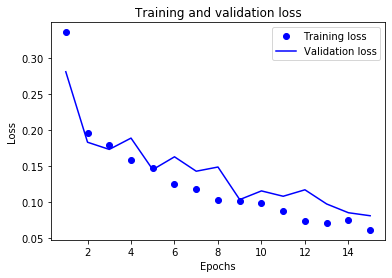

In [19]:
## Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

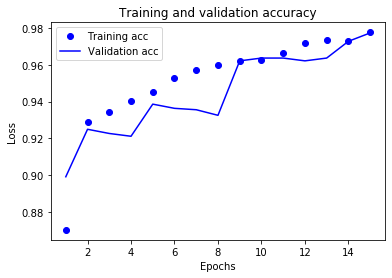

In [20]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
## evaluate the model
results = model.evaluate(X_test, y_test)
results 

1320/1320 [==============================] - 0s 71us/step


[0.08098277183193149, 0.9772727489471436]

## Report 

Here we will plot the classification report and confusion matrix. 

The classification report contains metrics i.e. precision, recall, and f1-score for evaluating the performance of the model.

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


y_pred = model.predict(X_test)

print(y_pred)
# for i in range(len(y_pred)):
#     print(y_pred[i])

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0


# for i in range(len(y_pred)):
#     print(y_pred[i])



# print(y_pred)
print(y_pred.shape)
print(y_test.shape)
print("\n")

print("calssification report: " )
print(classification_report(y_test, y_pred))

print("\n")
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

[[1.3172626e-03]
 [9.9999994e-01]
 [1.4447302e-02]
 ...
 [4.2468309e-05]
 [1.0168955e-01]
 [0.0000000e+00]]
(1320, 1)
(1320,)


calssification report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1109
           1       0.96      0.89      0.93       211

    accuracy                           0.98      1320
   macro avg       0.97      0.94      0.96      1320
weighted avg       0.98      0.98      0.98      1320



Confusion matrix: 
[[1102    7]
 [  23  188]]
